In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# engineering features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df['Propertycount'].value_counts()

21650.0    359
8870.0     298
14949.0    260
10969.0    249
14577.0    239
          ... 
1721.0       1
249.0        1
2493.0       1
1863.0       1
1424.0       1
Name: Propertycount, Length: 311, dtype: int64

In [6]:
df['Propertycount'].nunique()

311

In [7]:
df.drop(['Postcode','YearBuilt','CouncilArea','Distance','Address'],axis=1,inplace=True)
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.0,1.0,1.0,202.0,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,3.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,3.0,2.0,1.0,94.0,NaN,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,3.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
df.duplicated().sum()

0

# filling the nan values

In [10]:
df1=df
df1['BuildingArea']=df1['BuildingArea'].fillna(df1['BuildingArea'].mean())
df1.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.0,1.0,1.0,202.0,151.96765,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.0,1.0,0.0,156.0,79.00000,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,3.0,2.0,0.0,134.0,150.00000,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,3.0,2.0,1.0,94.0,151.96765,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,3.0,1.0,2.0,120.0,142.00000,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
df2=df1.dropna(axis=0)

In [12]:
df2.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Rooms          13518 non-null  int64  
 2   Type           13518 non-null  object 
 3   Price          13518 non-null  float64
 4   Method         13518 non-null  object 
 5   SellerG        13518 non-null  object 
 6   Date           13518 non-null  object 
 7   Bedroom2       13518 non-null  float64
 8   Bathroom       13518 non-null  float64
 9   Car            13518 non-null  float64
 10  Landsize       13518 non-null  float64
 11  BuildingArea   13518 non-null  float64
 12  Lattitude      13518 non-null  float64
 13  Longtitude     13518 non-null  float64
 14  Regionname     13518 non-null  object 
 15  Propertycount  13518 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.8+ MB


In [14]:
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.0,1.0,1.0,202.0,151.96765,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.0,1.0,0.0,156.0,79.00000,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,3.0,2.0,0.0,134.0,150.00000,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,3.0,2.0,1.0,94.0,151.96765,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,3.0,1.0,2.0,120.0,142.00000,-37.8072,144.9941,Northern Metropolitan,4019.0


In [15]:
df2['Type'].value_counts()

h    9389
u    3015
t    1114
Name: Type, dtype: int64

In [16]:
df2['SellerG'].value_counts()

Nelson           1558
Jellis           1303
hockingstuart    1160
Barry            1010
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64

In [17]:
df2['Method'].value_counts()

S     8988
SP    1695
PI    1557
VB    1187
SA      91
Name: Method, dtype: int64

In [18]:
df2.describe()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
count,13518.000000,1.351800e+04,13518.000000,13518.00000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000
mean,2.939784,1.074796e+06,2.916408,1.53536,1.610075,558.110593,152.052356,-37.809191,144.995306,7455.482986
std,0.956438,6.398586e+05,0.966692,0.69231,0.962634,3998.194560,392.894884,0.079366,0.104003,4381.437721
min,1.000000,8.500000e+04,0.000000,0.00000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,2.000000,1.00000,1.000000,178.000000,122.000000,-37.857000,144.929425,4380.000000
50%,3.000000,9.010000e+05,3.000000,1.00000,2.000000,442.500000,151.967650,-37.802300,145.000300,6567.000000
75%,3.000000,1.328000e+06,3.000000,2.00000,2.000000,651.000000,151.967650,-37.756203,145.058600,10331.000000
max,10.000000,9.000000e+06,20.000000,8.00000,10.000000,433014.000000,44515.000000,-37.408530,145.526350,21650.000000


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Rooms          13518 non-null  int64  
 2   Type           13518 non-null  object 
 3   Price          13518 non-null  float64
 4   Method         13518 non-null  object 
 5   SellerG        13518 non-null  object 
 6   Date           13518 non-null  object 
 7   Bedroom2       13518 non-null  float64
 8   Bathroom       13518 non-null  float64
 9   Car            13518 non-null  float64
 10  Landsize       13518 non-null  float64
 11  BuildingArea   13518 non-null  float64
 12  Lattitude      13518 non-null  float64
 13  Longtitude     13518 non-null  float64
 14  Regionname     13518 non-null  object 
 15  Propertycount  13518 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.8+ MB


In [20]:
df2['Date']=pd.to_datetime(df2['Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13518 non-null  object        
 1   Rooms          13518 non-null  int64         
 2   Type           13518 non-null  object        
 3   Price          13518 non-null  float64       
 4   Method         13518 non-null  object        
 5   SellerG        13518 non-null  object        
 6   Date           13518 non-null  datetime64[ns]
 7   Bedroom2       13518 non-null  float64       
 8   Bathroom       13518 non-null  float64       
 9   Car            13518 non-null  float64       
 10  Landsize       13518 non-null  float64       
 11  BuildingArea   13518 non-null  float64       
 12  Lattitude      13518 non-null  float64       
 13  Longtitude     13518 non-null  float64       
 14  Regionname     13518 non-null  object        
 15  Propertycount  1351

In [21]:
df2['day']=df2['Date'].dt.day
df2['month']=df2['Date'].dt.month
df2['year']=df2['Date'].dt.year
df2['dayname']=df2['Date'].dt.day_name()

In [22]:
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year,dayname
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.0,1.0,1.0,202.0,151.96765,-37.7996,144.9984,Northern Metropolitan,4019.0,12,3,2016,Saturday
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.0,1.0,0.0,156.0,79.00000,-37.8079,144.9934,Northern Metropolitan,4019.0,2,4,2016,Saturday
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,3.0,2.0,0.0,134.0,150.00000,-37.8093,144.9944,Northern Metropolitan,4019.0,3,4,2017,Monday
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,3.0,2.0,1.0,94.0,151.96765,-37.7969,144.9969,Northern Metropolitan,4019.0,3,4,2017,Monday
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,3.0,1.0,2.0,120.0,142.00000,-37.8072,144.9941,Northern Metropolitan,4019.0,6,4,2016,Wednesday


# detecting outliers

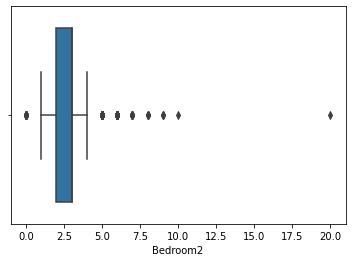

In [23]:
plt.figure(figsize=(6,4))
ax=sns.boxplot(x='Bedroom2',data=df2)

In [24]:
q1 = df2['Bedroom2'].quantile(0.25) 
q3 = df2['Bedroom2'].quantile(0.75) 
iqr = q3 - q1
lower_limit =q1-(1.5*iqr)
upper_limit = q3 + (1.5*iqr)
print( "  upper :" ,upper_limit,__, "lower :",lower_limit )

  upper : 4.5  lower : 0.5


In [25]:
df2[(df2['Bedroom2']<lower_limit) |(df2['Bedroom2']>upper_limit) ]


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year,dayname
47,Airport West,6,h,725000.0,SP,Barry,2016-07-05,6.0,3.0,2.0,976.0,186.00000,-37.72390,144.87350,Western Metropolitan,3464.0,5,7,2016,Tuesday
63,Airport West,4,h,773000.0,S,Brad,2016-09-17,5.0,3.0,4.0,531.0,309.00000,-37.72630,144.86790,Western Metropolitan,3464.0,17,9,2016,Saturday
93,Albert Park,5,h,2100000.0,S,Greg,2016-10-12,5.0,2.0,1.0,237.0,151.96765,-37.84360,144.95570,Southern Metropolitan,3280.0,12,10,2016,Wednesday
124,Alphington,5,h,2840000.0,S,Nelson,2016-12-06,5.0,4.0,4.0,809.0,165.00000,-37.77500,145.02680,Northern Metropolitan,2211.0,6,12,2016,Tuesday
135,Alphington,2,t,650000.0,SP,Brace,2016-09-24,0.0,1.0,0.0,0.0,151.96765,-37.78480,145.02500,Northern Metropolitan,2211.0,24,9,2016,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13468,Kew,5,h,3450000.0,PI,Kay,2017-08-26,5.0,2.0,2.0,668.0,0.00000,-37.80795,145.01474,Southern Metropolitan,10331.0,26,8,2017,Saturday
13487,Melton,5,h,710000.0,PI,Ryder,2017-08-26,5.0,2.0,2.0,1670.0,280.00000,-37.67813,144.59292,Western Victoria,3600.0,26,8,2017,Saturday
13503,Mount Waverley,6,h,1840000.0,S,Jellis,2017-08-26,6.0,2.0,2.0,554.0,368.00000,-37.87591,145.13958,Eastern Metropolitan,13366.0,26,8,2017,Saturday
13560,Templestowe Lower,5,h,1400000.0,S,Barry,2017-08-26,5.0,3.0,2.0,717.0,310.00000,-37.76630,145.11320,Eastern Metropolitan,5420.0,26,8,2017,Saturday


In [26]:
df3=df2[~((df2['Bedroom2']<lower_limit) |(df2['Bedroom2']>upper_limit))]
df3.shape

(12863, 20)

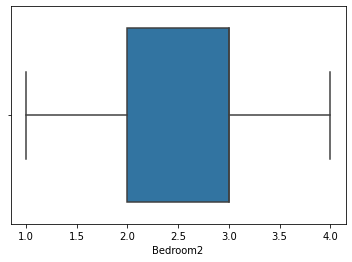

In [27]:
plt.figure(figsize=(6,4))
ax=sns.boxplot(x='Bedroom2',data=df3)

In [28]:
df3.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year,dayname
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.0,1.0,1.0,202.0,151.96765,-37.7996,144.9984,Northern Metropolitan,4019.0,12,3,2016,Saturday
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.0,1.0,0.0,156.0,79.00000,-37.8079,144.9934,Northern Metropolitan,4019.0,2,4,2016,Saturday
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,3.0,2.0,0.0,134.0,150.00000,-37.8093,144.9944,Northern Metropolitan,4019.0,3,4,2017,Monday
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,3.0,2.0,1.0,94.0,151.96765,-37.7969,144.9969,Northern Metropolitan,4019.0,3,4,2017,Monday
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,3.0,1.0,2.0,120.0,142.00000,-37.8072,144.9941,Northern Metropolitan,4019.0,6,4,2016,Wednesday


# most common house type

<AxesSubplot:ylabel='Type'>

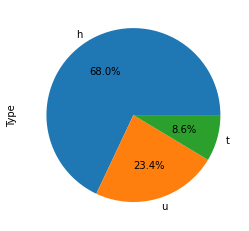

In [29]:
df3['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='Method'>

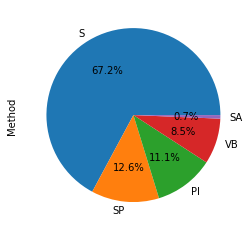

In [30]:
df3['Method'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# region's count

Text(0, 0.5, 'Count')

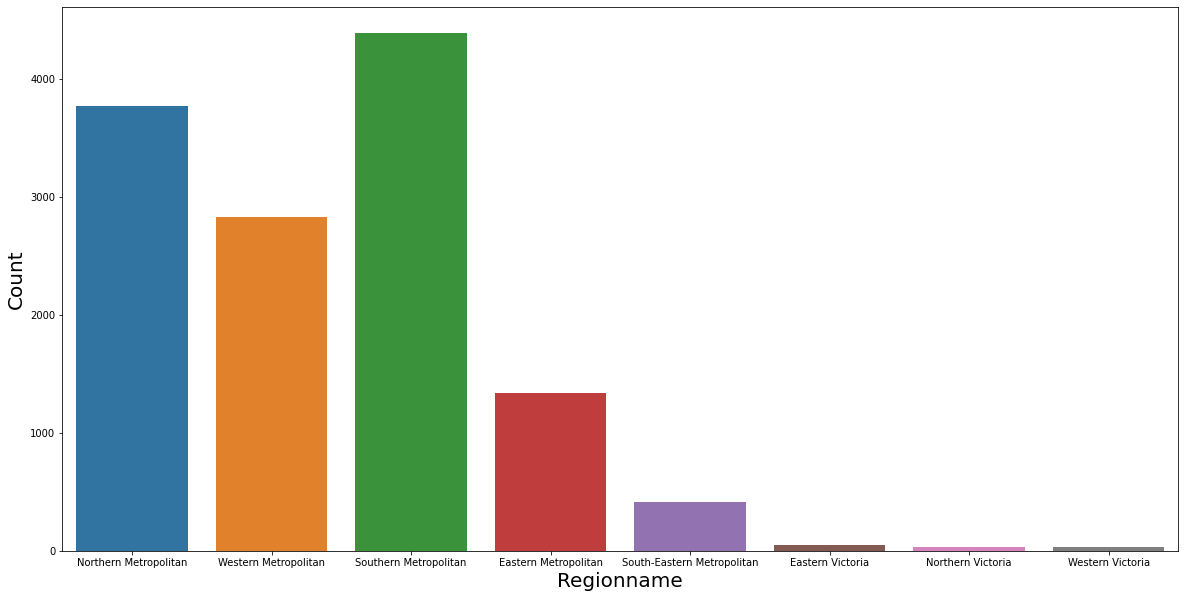

In [31]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df3['Regionname'])
plt.xlabel('Regionname',fontsize=20)
plt.ylabel('Count',fontsize=20)

# top 10 sellers

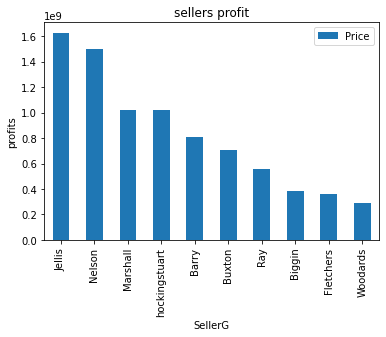

In [35]:
a=df3.groupby(['SellerG']).sum()[['Price']].sort_values(by='Price',ascending=False)[0:10].plot(kind='bar')
plt.xlabel('SellerG')
plt.ylabel('profits')
plt.title('sellers profit')
plt.show()

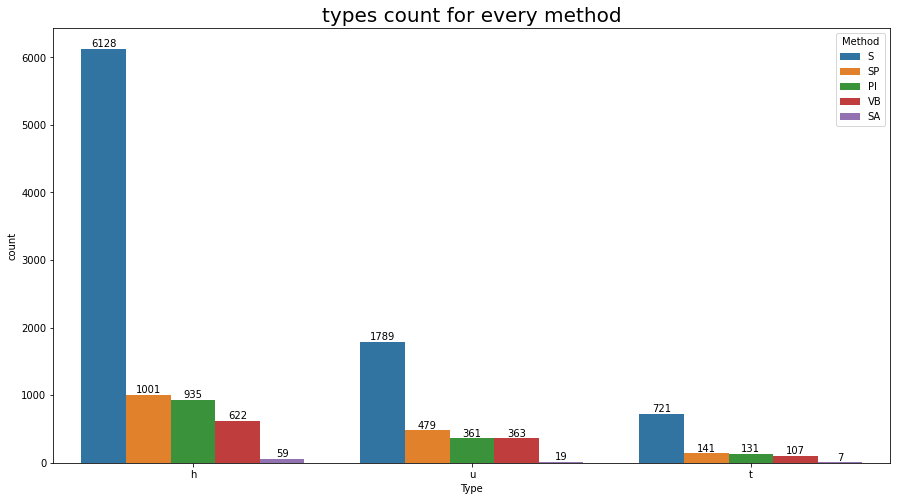

In [42]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Type',hue='Method',data=df3)
plt.title('types count for every method',fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars)

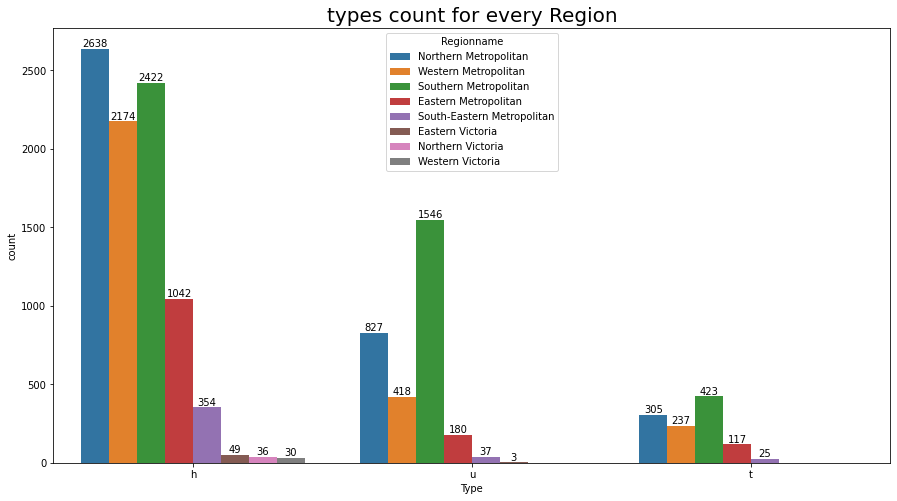

In [43]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Type',hue='Regionname',data=df3)
plt.title('types count for every Region',fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Count')

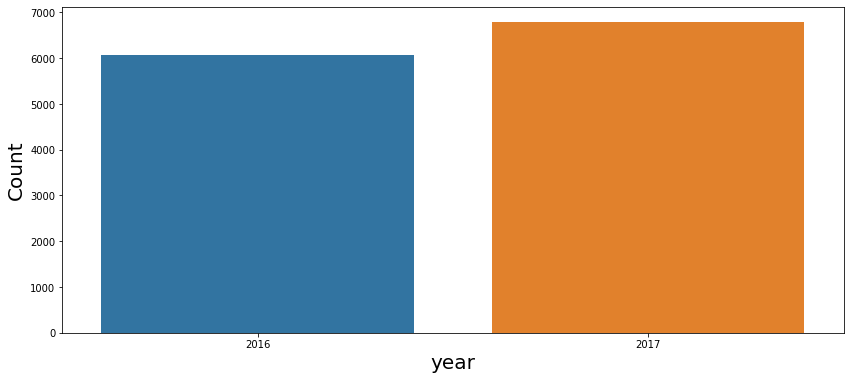

In [45]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x=df3['year'])
plt.xlabel('year',fontsize=20)
plt.ylabel('Count',fontsize=20)

Text(0, 0.5, 'Count')

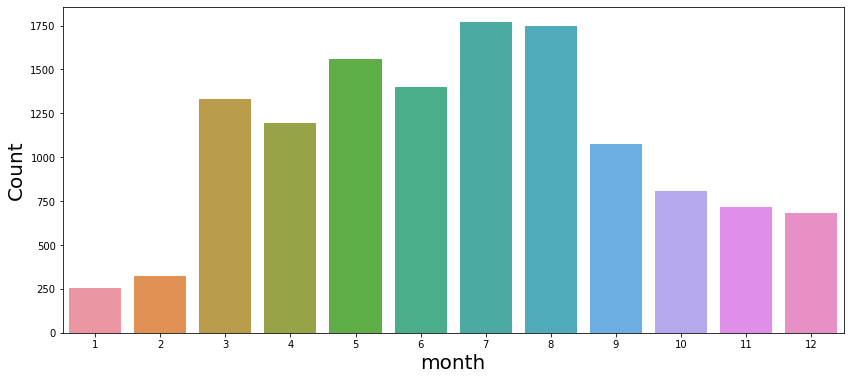

In [46]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x=df3['month'])
plt.xlabel('month',fontsize=20)
plt.ylabel('Count',fontsize=20)

Text(0, 0.5, 'Count')

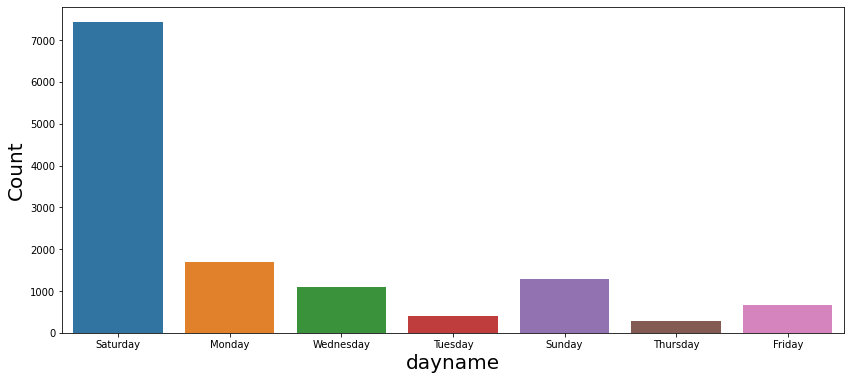

In [47]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x=df3['dayname'])
plt.xlabel('dayname',fontsize=20)
plt.ylabel('Count',fontsize=20)

# correlation between variables

In [50]:
df3.corr()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,day,month,year
Rooms,1.000000,0.469454,0.952789,0.525778,0.387671,0.021419,0.278457,0.025005,0.069411,-0.082289,0.024103,0.014956,0.088588
Price,0.469454,1.000000,0.453893,0.416689,0.211592,0.036339,0.242149,-0.215204,0.197499,-0.043188,-0.002061,0.009112,0.004218
Bedroom2,0.952789,0.453893,1.000000,0.515807,0.389358,0.021753,0.273010,0.026942,0.072700,-0.080821,0.024828,0.018751,0.121817
Bathroom,0.525778,0.416689,0.515807,1.000000,0.281634,0.035074,0.237807,-0.075527,0.095916,-0.049249,-0.008272,0.014196,0.039188
Car,0.387671,0.211592,0.389358,0.281634,1.000000,0.022041,0.139611,-0.002487,0.058587,-0.019388,0.014247,0.020388,0.082353
Landsize,0.021419,0.036339,0.021753,0.035074,0.022041,1.000000,0.010364,0.006082,0.012540,-0.005179,-0.008850,0.009926,0.029206
BuildingArea,0.278457,0.242149,0.273010,0.237807,0.139611,0.010364,1.000000,-0.018380,0.051838,-0.034388,-0.004609,0.012672,0.018949
Lattitude,0.025005,-0.215204,0.026942,-0.075527,-0.002487,0.006082,-0.018380,1.000000,-0.355891,0.049978,0.001095,0.008895,-0.005337
Longtitude,0.069411,0.197499,0.072700,0.095916,0.058587,0.012540,0.051838,-0.355891,1.000000,0.067769,0.002363,0.007505,0.067895
Propertycount,-0.082289,-0.043188,-0.080821,-0.049249,-0.019388,-0.005179,-0.034388,0.049978,0.067769,1.000000,0.001248,0.002772,-0.004909


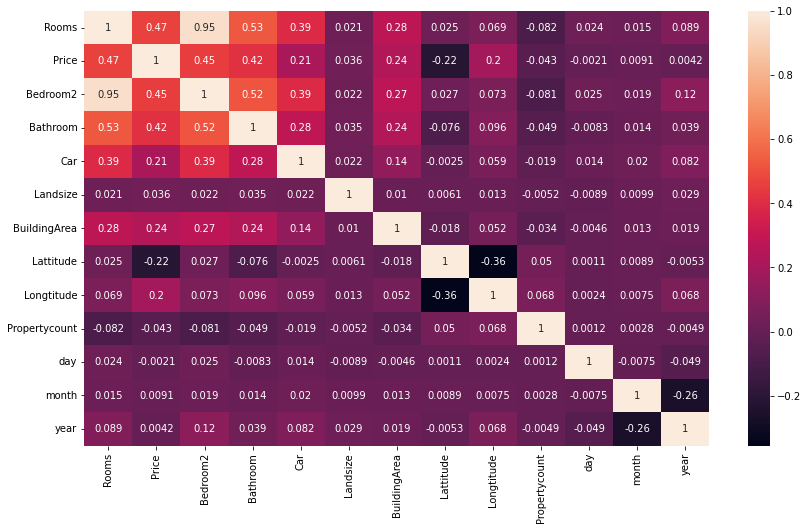

In [52]:
plt.figure(figsize=(14,8))
ax=sns.heatmap(df3.corr(),annot=True)

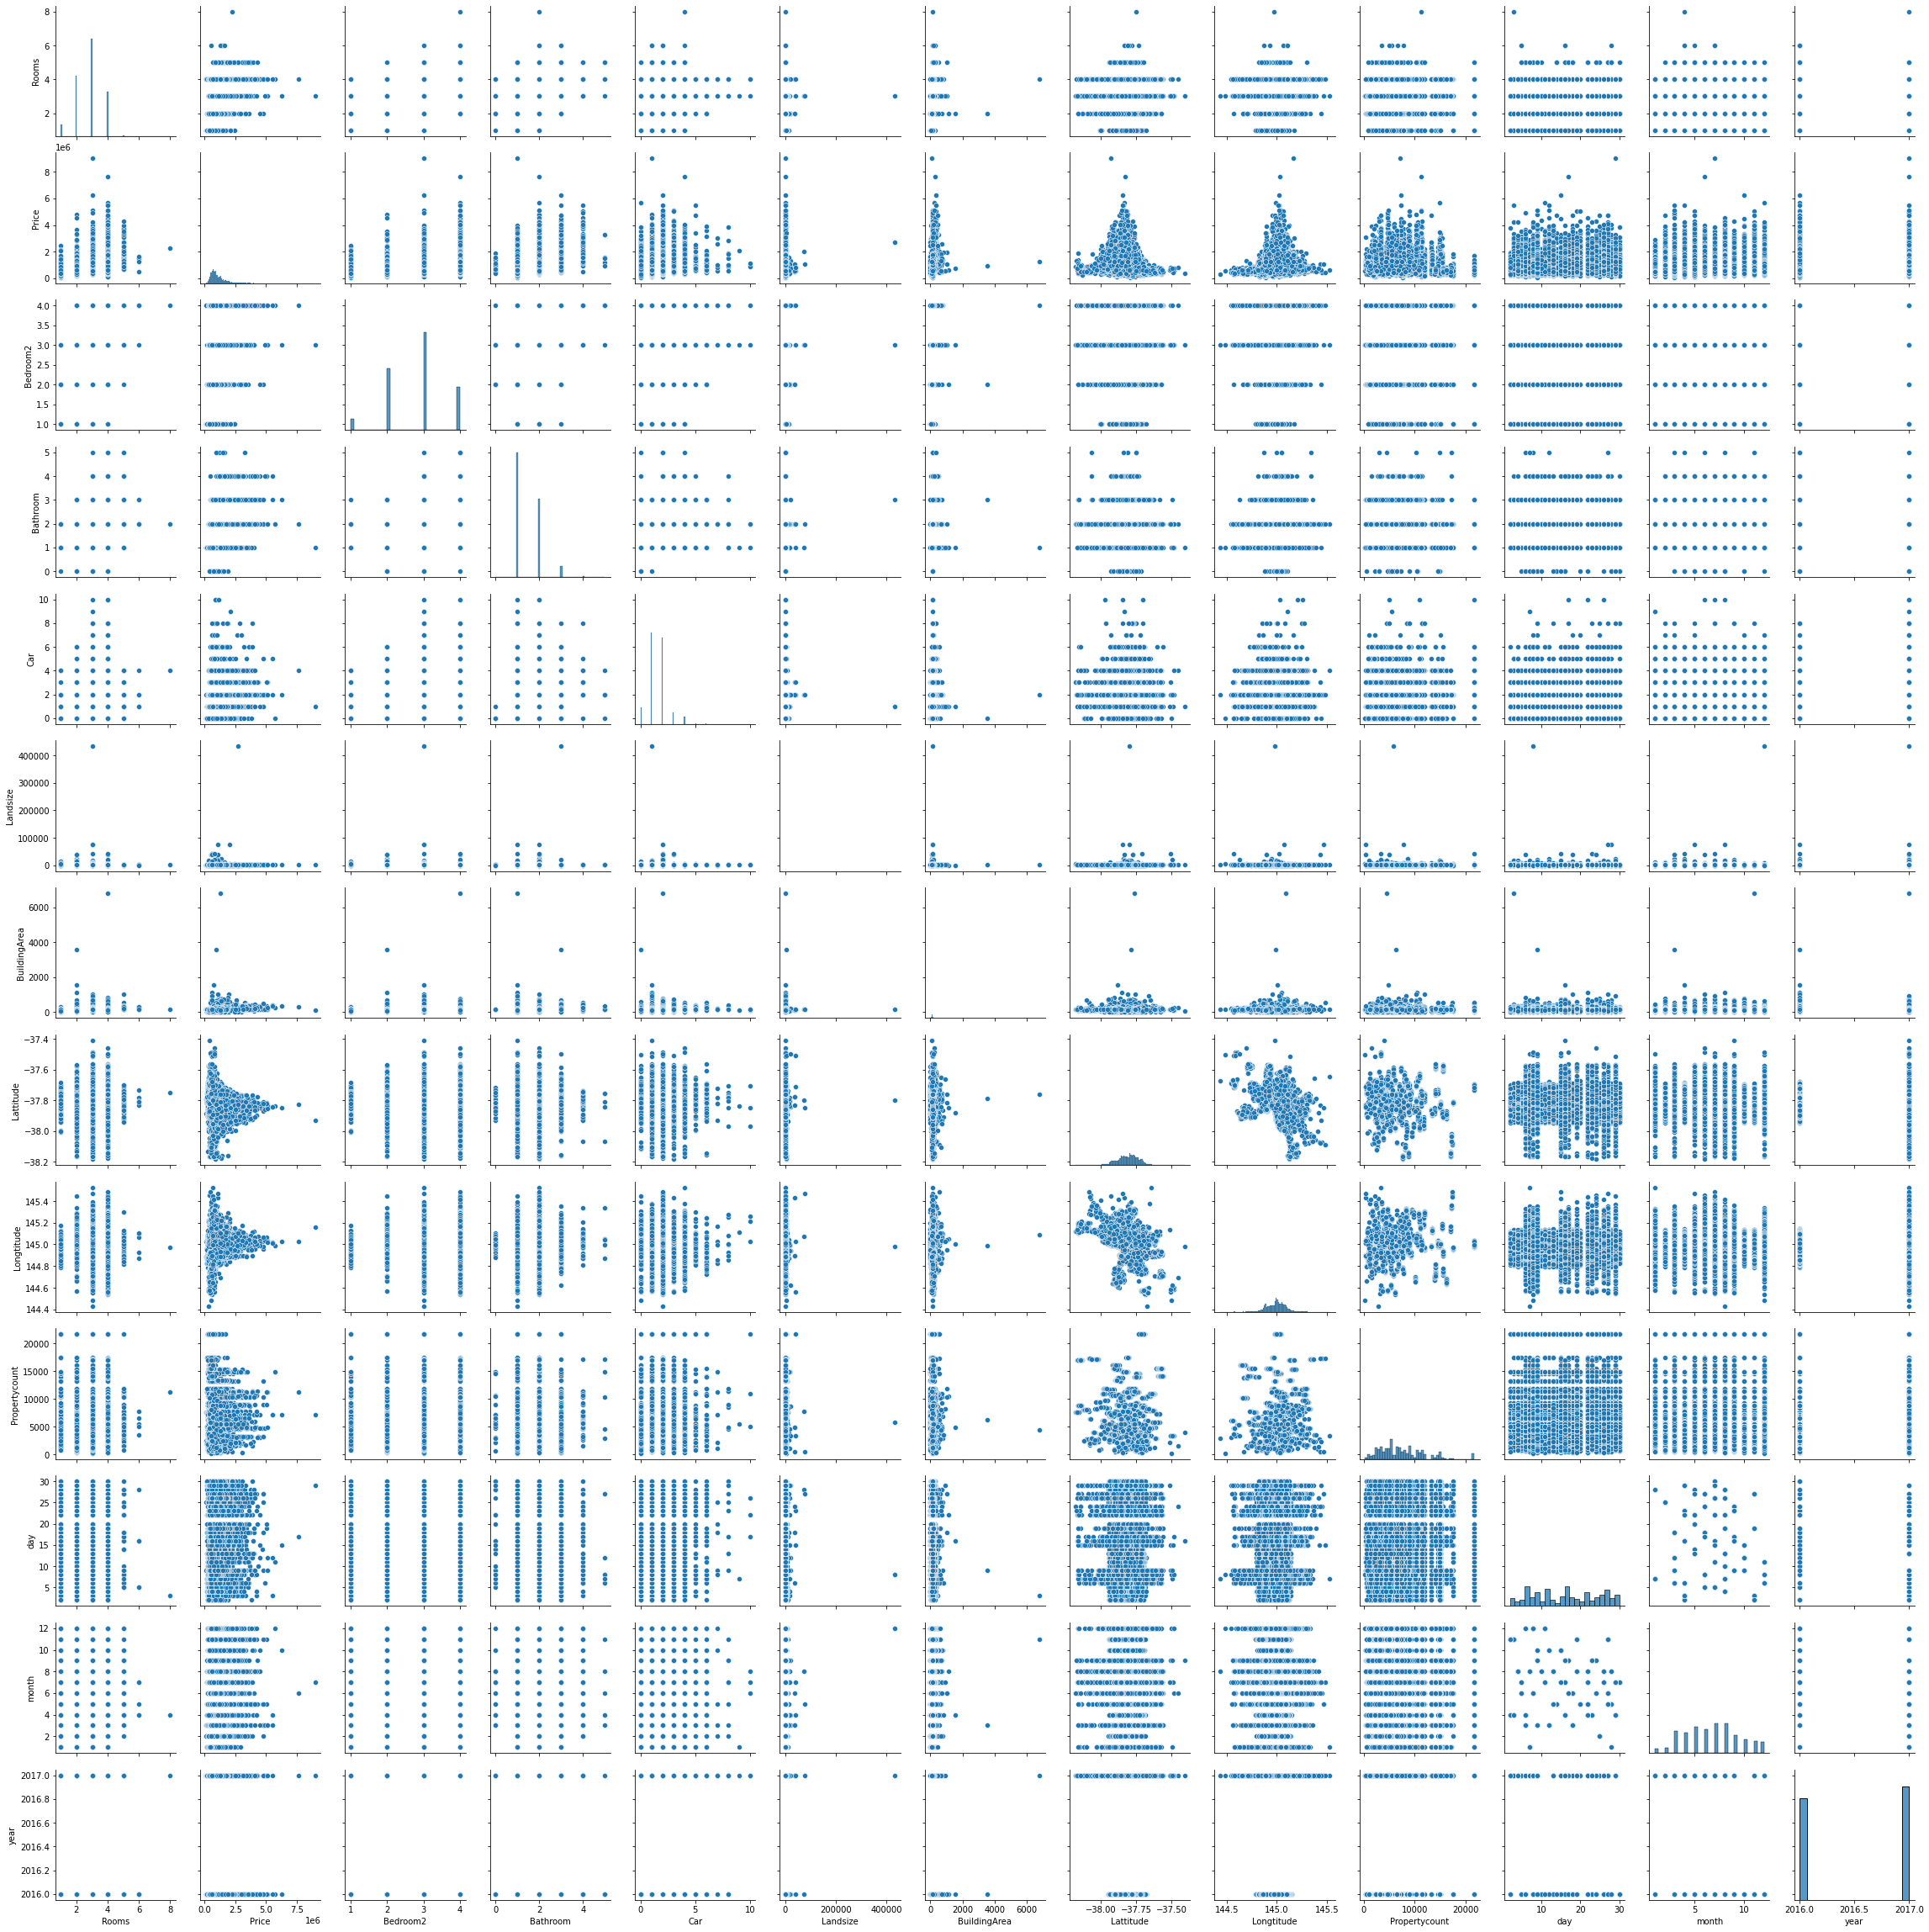

In [53]:
sns.pairplot(df3)

# price prediction

In [54]:
df3.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year,dayname
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.0,1.0,1.0,202.0,151.96765,-37.7996,144.9984,Northern Metropolitan,4019.0,12,3,2016,Saturday
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.0,1.0,0.0,156.0,79.00000,-37.8079,144.9934,Northern Metropolitan,4019.0,2,4,2016,Saturday
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,3.0,2.0,0.0,134.0,150.00000,-37.8093,144.9944,Northern Metropolitan,4019.0,3,4,2017,Monday
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,3.0,2.0,1.0,94.0,151.96765,-37.7969,144.9969,Northern Metropolitan,4019.0,3,4,2017,Monday
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,3.0,1.0,2.0,120.0,142.00000,-37.8072,144.9941,Northern Metropolitan,4019.0,6,4,2016,Wednesday


In [165]:
df4=df3.drop(['Suburb','SellerG','Date','Type','Method','Lattitude','Longtitude','Propertycount','day','month','year','dayname'],axis=1)
df4.head()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname
0,2,1480000.0,2.0,1.0,1.0,202.0,151.96765,Northern Metropolitan
1,2,1035000.0,2.0,1.0,0.0,156.0,79.00000,Northern Metropolitan
2,3,1465000.0,3.0,2.0,0.0,134.0,150.00000,Northern Metropolitan
3,3,850000.0,3.0,2.0,1.0,94.0,151.96765,Northern Metropolitan
4,4,1600000.0,3.0,1.0,2.0,120.0,142.00000,Northern Metropolitan


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [173]:
df5=pd.get_dummies(df4)
df5.head()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.0,1.0,1.0,202.0,151.96765,0,0,1,0,0,0,0,0
1,2,1035000.0,2.0,1.0,0.0,156.0,79.00000,0,0,1,0,0,0,0,0
2,3,1465000.0,3.0,2.0,0.0,134.0,150.00000,0,0,1,0,0,0,0,0
3,3,850000.0,3.0,2.0,1.0,94.0,151.96765,0,0,1,0,0,0,0,0
4,4,1600000.0,3.0,1.0,2.0,120.0,142.00000,0,0,1,0,0,0,0,0


In [124]:
df5.dtypes

Rooms                                      int64
Price                                    float64
Bathroom                                 float64
Car                                      float64
BuildingArea                             float64
Regionname_Eastern Metropolitan            uint8
Regionname_Eastern Victoria                uint8
Regionname_Northern Metropolitan           uint8
Regionname_Northern Victoria               uint8
Regionname_South-Eastern Metropolitan      uint8
Regionname_Southern Metropolitan           uint8
Regionname_Western Metropolitan            uint8
Regionname_Western Victoria                uint8
dtype: object

In [174]:
X=df5.drop('Price',axis=1)
y=df5.Price

In [176]:
from sklearn.metrics import mean_absolute_error
de_tr = DecisionTreeRegressor()
de_tr.fit(X_train, y_train)
val_pred= de_tr.predict(X_test)
print(mean_absolute_error(y_test, val_pred))

349591.8049812644


#  mean absolute error for the in-testing data is more than 349,000 dollars
#  There are many ways to improve this model, such as experimenting to find better features or different model types

In [169]:
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.4222215862243437

In [170]:
cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.42238941, 0.4062176 , 0.417916  , 0.42220178, 0.42854756])

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),'params':{
                'normalize':[True,False]
            }
        },'lasso':{
            'model':Lasso(),'params':{
                'alpha':[1,2],'selection':['random','cyclic']
            }
        },'decision_tree':{
            'model':DecisionTreeRegressor(),'params':{
                'criterion':['mse','friedman_mse'],'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,'best_score':gs.best_score_,'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params']) 
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.419454,{'normalize': False}
1,lasso,0.419455,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.127119,"{'criterion': 'mse', 'splitter': 'random'}"


# we need more data to can improve the accuracy of model